# Jessie Xie(21918545)
# Decision trees

> Note: use the X_train, X_test, y_train, y_test from github to keep consistent <br>
>
> The purpose of the notebook is to explore a decision tree on different datasets, and then decide which dataset should we focus on. <br>
> In addition, I try the oversampling method and find that oversampling mehthod improve the performance of the decision tree model.<br>

In [137]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import graphviz 

from sklearn.utils import resample


In [82]:
# Read in the csv file
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [109]:
# view the distribution of OverallPoF of the training set and test set as the baseline
print("The percentage of pass (training set): ", sum(y_train['OverallPoF']==0)/len(y_train["OverallPoF"]))
print("The percentage of fail (training set):", sum(y_train['OverallPoF']==1)/len(y_train["OverallPoF"]))
print("The percentage of pass (test set): ", sum(y_test['OverallPoF']==0)/len(y_test["OverallPoF"]))
print("The percentage of fail (test set):", sum(y_test['OverallPoF']==1)/len(y_test["OverallPoF"]))

The percentage of pass (training set):  0.837696335078534
The percentage of fail (training set): 0.16230366492146597
The percentage of pass (test set):  0.8541666666666666
The percentage of fail (test set): 0.14583333333333334


# 1. Without handling imbalenced dataset

## 1.1. Absorbance data with only frequencies

### Training dataset

In [239]:
print(X_train.shape)
X_train.head()

(191, 332)


,Gender,AgeM,ECV,TPP,SC,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,...,fp6168,fp6349,fp6535,fp6727,fp6924,fp7127,fp7336,fp7550,fp7772,fp8000
0,0,97,1.15,-12,0.640,7.5,9.7,8.3,9.5,13.3,...,-87.4561,-86.6062,-88.3803,-86.8637,-57.9457,78.3099,85.7196,88.3320,86.9940,88.4067
1,0,121,1.55,8,0.540,16.0,11.0,16.0,8.0,3.0,...,-79.7325,-77.0906,-74.7575,-67.2779,-52.5252,-23.1391,20.7374,52.0204,62.9663,67.2197
2,0,114,1.28,-49,1.280,7.0,4.0,9.0,5.0,6.0,...,63.0352,70.9697,75.9390,77.5764,78.5428,80.4686,81.4860,82.9247,83.6925,84.7525
3,1,117,0.94,-65,0.500,5.7,7.6,0.0,0.4,-0.4,...,-74.4069,-74.6954,-76.0496,-75.9852,-74.2634,-74.4995,-73.1774,-71.8402,-60.6300,-66.9071
4,0,105,0.79,-16,0.625,0.0,-2.6,-5.7,-2.3,-0.8,...,-88.6286,-88.5374,-89.8485,-89.2124,-87.8775,-89.3538,-90.0951,-91.2766,-89.8949,-95.2101


<AxesSubplot:title={'center':'Count(Original)'}>

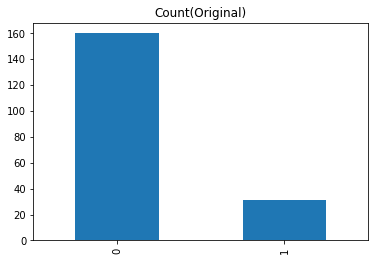

In [237]:
y_train.OverallPoF.value_counts().plot(kind='bar', title='Count(Original)')

In [84]:
# Select frequencies columns based on the absorbance table
X_train_names = list(X_train)
print("The index of f(226.0000) in the absorbance table: ",X_train_names.index("fa226")) # find the index of f(226.0000)
print("The index of f(8000.0000) in the absorbance table: ",X_train_names.index("fa8000")) # find the index of f(8000.0000)

The index of f(226.0000) in the absorbance table:  11
The index of f(8000.0000) in the absorbance table:  117


In [85]:
# Select OverallPoF and frequencies columns 
X_train_frequencies_a = X_train.iloc[:, 11:118]
X_train_frequencies_a.shape

(191, 107)

> Comment: there is 191 observations and 107 frequencies in the training dataset.

### Test dataset

In [86]:
# Select frequencies columns based on the absorbance table
X_test_names = list(X_test)
print("The index of f(226.0000) in the absorbance table: ",X_test_names.index("fa226")) # find the index of f(226.0000)
print("The index of f(8000.0000) in the absorbance table: ",X_test_names.index("fa8000")) # find the index of f(8000.0000)

The index of f(226.0000) in the absorbance table:  11
The index of f(8000.0000) in the absorbance table:  117


In [88]:
# Select OverallPoF and frequencies columns 
X_test_frequencies_a = X_test.iloc[:, 11:118]
X_test_frequencies_a.shape

(48, 107)

### Decision trees

In [89]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini_freq_a = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

# fit the model
clf_gini_freq_a.fit(X_train_frequencies_a, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [125]:
# Calculate accuracy score and f1 score
y_pred_gini_freq_a = clf_gini_freq_a.predict(X_test_frequencies_a)
y_pred_gini_freq_a_train = clf_gini_freq_a.predict(X_train_frequencies_a)

print('Model accuracy score with criterion gini index (train set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini_freq_a_train)))
print('Model accuracy score with criterion gini index (test set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_freq_a)))

print('F1 score (training set):{0:0.4f}'. format(f1_score(y_train, y_pred_gini_freq_a_train)))
print('F1 score (test set):{0:0.4f}'. format(f1_score(y_test, y_pred_gini_freq_a)))

Model accuracy score with criterion gini index (train set): 0.9843
Model accuracy score with criterion gini index (test set): 0.8958
F1 score (training set):0.9492
F1 score (test set):0.7368


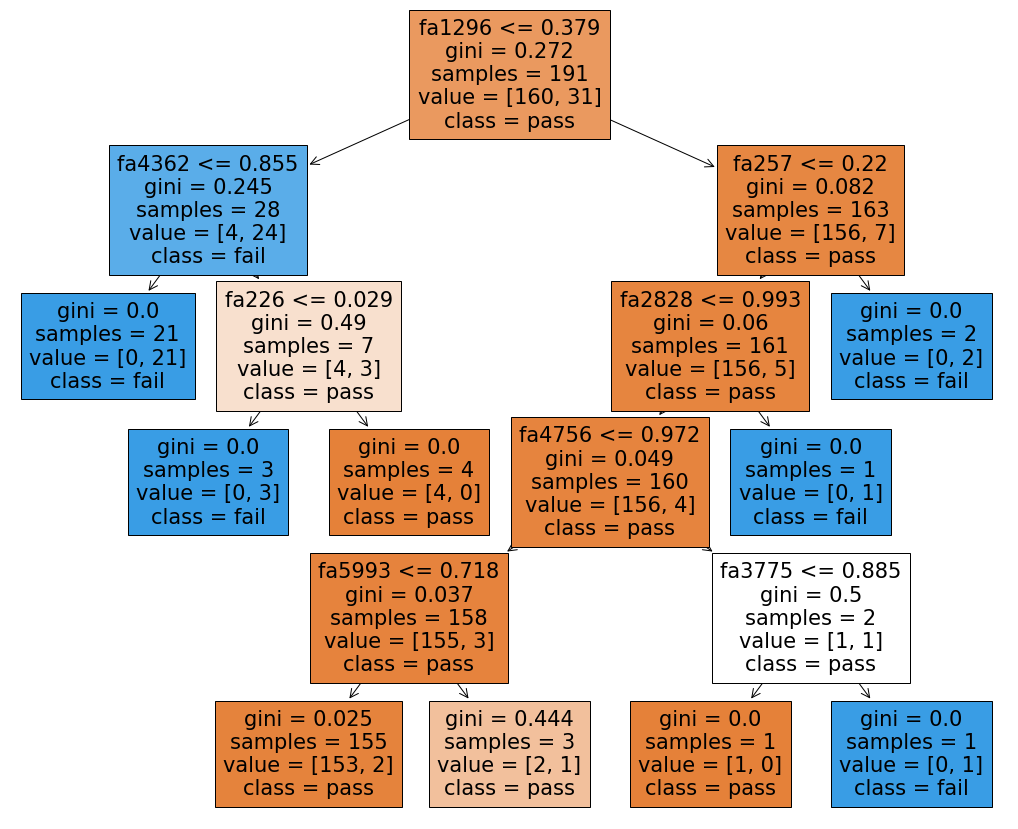

In [110]:
# find the name of features of the training dataset
X_train_freq_name = X_train_frequencies_a.columns.to_list()

fig = plt.figure(figsize=(18,15))
_ = tree.plot_tree(clf_gini_freq_a, feature_names=X_train_freq_name,class_names=['pass', 'fail'], filled=True)

#fig.savefig("decistion_tree.png")

## 1.2. Absorbance data with frequencies + other variables

In [96]:
# Training dataset
X_train_a = X_train.iloc[:, :118]
print("The shape of absorbance training data:",X_train_a.shape)
# Test dataset
X_test_a = X_test.iloc[:,:118]
print("The shape of absorbance test data:", X_test_a.shape)

The shape of absorbance training data: (191, 118)
The shape of absorbance test data: (48, 118)


In [97]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini_a = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

# fit the model
clf_gini_a.fit(X_train_a, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [128]:
# Calculate accuracy score and f1 score
y_pred_gini_a = clf_gini_a.predict(X_test_a)
y_pred_gini_a_train = clf_gini_a.predict(X_train_a)

print('Model accuracy score with criterion gini index (training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini_a_train)))
print('Model accuracy score with criterion gini index (test set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_a)))

print('F1 score (training set): {0:0.4f}'. format(f1_score(y_train, y_pred_gini_a_train)))
print('F1 score (test set): {0:0.4f}'. format(f1_score(y_test, y_pred_gini_a)))

Model accuracy score with criterion gini index (training set): 1.0000
Model accuracy score with criterion gini index (test set): 0.9583
F1 score (training set): 1.0000
F1 score (test set): 0.8750


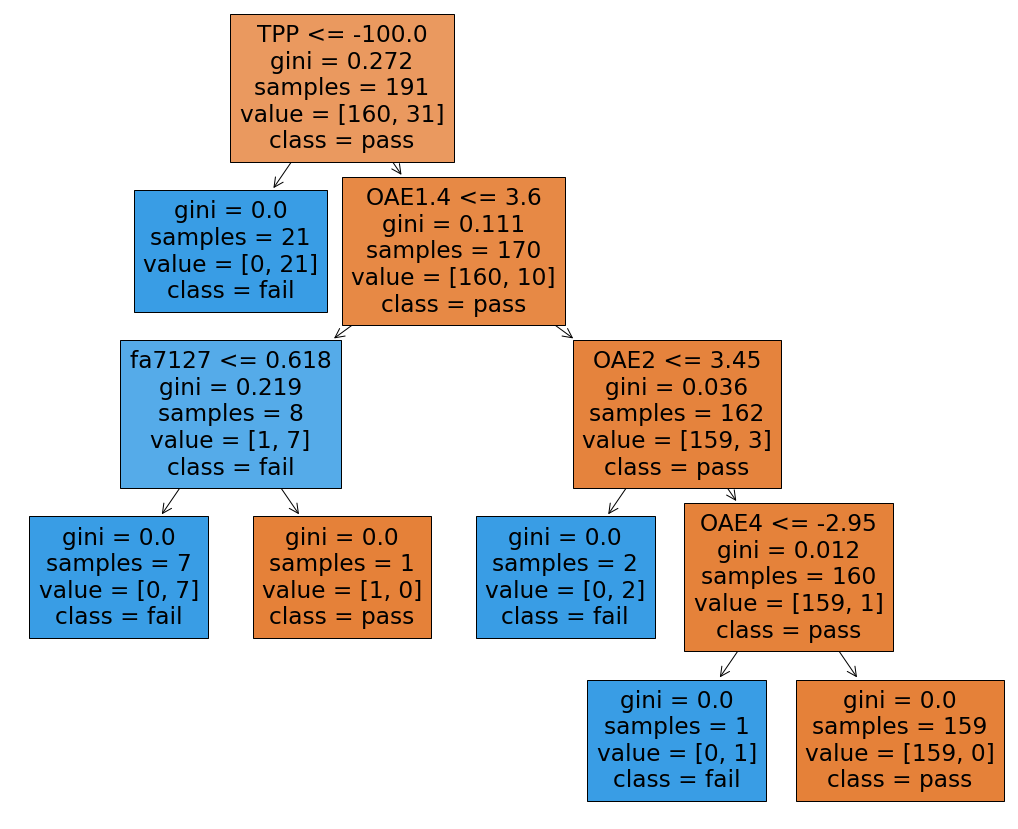

In [111]:
# find the name of features of the training dataset
X_train_name = X_train_a.columns.to_list()

fig = plt.figure(figsize=(18,15))
_ = tree.plot_tree(clf_gini_a, feature_names=X_train_name,class_names=['pass', 'fail'], filled=True)

#fig.savefig("decistion_tree.png")

## 1.3. Absorbance + YAdmittance + Phase data with only frequencies 

In [100]:
# Training dataset
X_train_freq = X_train.iloc[:, 11:]
print("The shape of training data (frequencies only):",X_train_freq.shape)
# Test dataset
X_test_freq = X_test.iloc[:,11:]
print("The shape of absorbance test data (frequencies only):", X_test_freq.shape)

The shape of training data (frequencies only): (191, 321)
The shape of absorbance test data (frequencies only): (48, 321)


In [102]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini_freq = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

# fit the model
clf_gini_freq.fit(X_train_freq, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [129]:
# Calculate accuracy score and f1 score
y_pred_gini_freq = clf_gini_freq.predict(X_test_freq)
y_pred_gini_freq_train = clf_gini_freq.predict(X_train_freq)

print('Model accuracy score with criterion gini index (training set) (frequencies only): {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini_freq_train)))
print('Model accuracy score with criterion gini index (test set) (frequencies only): {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_freq)))
print('F1 score (training set) (frequencies only): {0:0.4f}'. format(f1_score(y_train, y_pred_gini_freq_train)))
print('F1 score (test set) (frequencies only): {0:0.4f}'. format(f1_score(y_test, y_pred_gini_freq)))

Model accuracy score with criterion gini index (training set) (frequencies only): 0.9895
Model accuracy score with criterion gini index (test set) (frequencies only): 0.8750
F1 score (training set) (frequencies only): 0.9667
F1 score (test set) (frequencies only): 0.7000


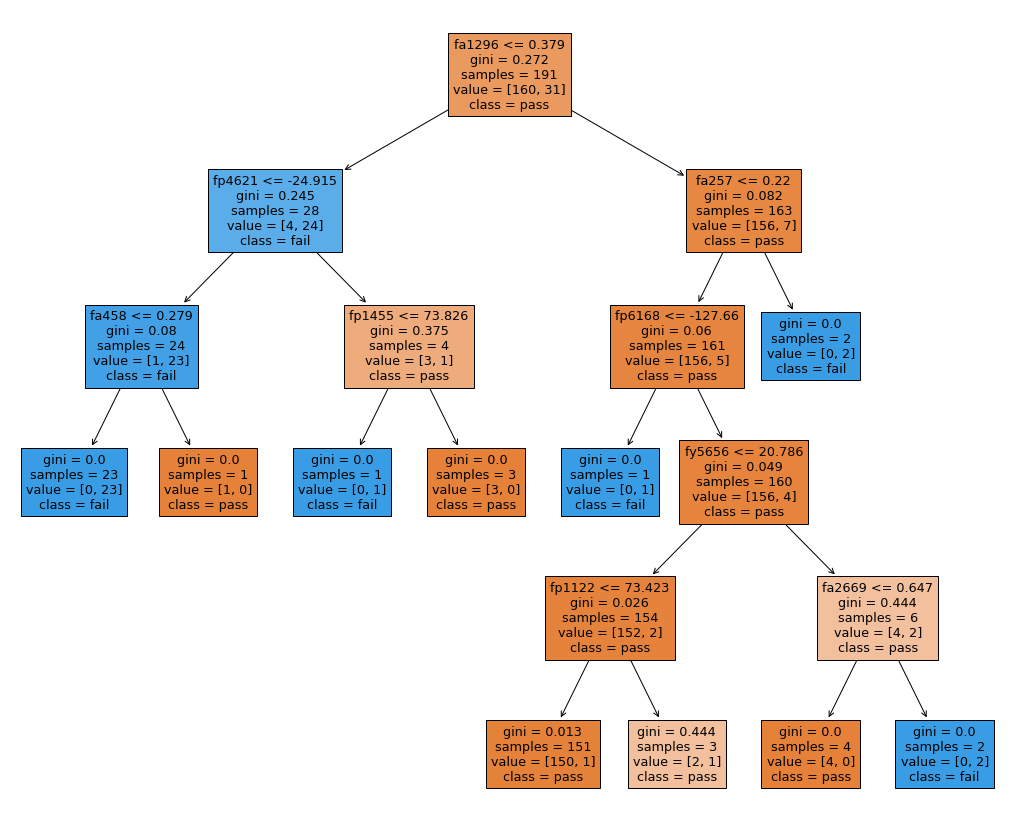

In [112]:
# find the name of features of the training dataset
X_train_name = X_train_freq.columns.to_list()

fig = plt.figure(figsize=(18,15))
_ = tree.plot_tree(clf_gini_freq, feature_names=X_train_name,class_names=['pass', 'fail'], filled=True)

#fig.savefig("decistion_tree.png")

## 1.4. Absorbance + YAdmittance + Phase data with all variables

In [119]:
print('The shape of X training set:', X_train.shape)
print('The shape of X test set:', X_test.shape)

The shape of X training set: (191, 332)
The shape of X test set: (48, 332)


In [115]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [130]:
# Calculate accuracy score and f1 score
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini_train = clf_gini.predict(X_train)

print('Model accuracy score with criterion gini index (training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini_train)))
print('Model accuracy score with criterion gini index (test set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('F1 score (training set): {0:0.4f}'. format(f1_score(y_train, y_pred_gini_train)))
print('F1 score (test set): {0:0.4f}'. format(f1_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index (training set): 1.0000
Model accuracy score with criterion gini index (test set): 0.9583
F1 score (training set): 1.0000
F1 score (test set): 0.8750


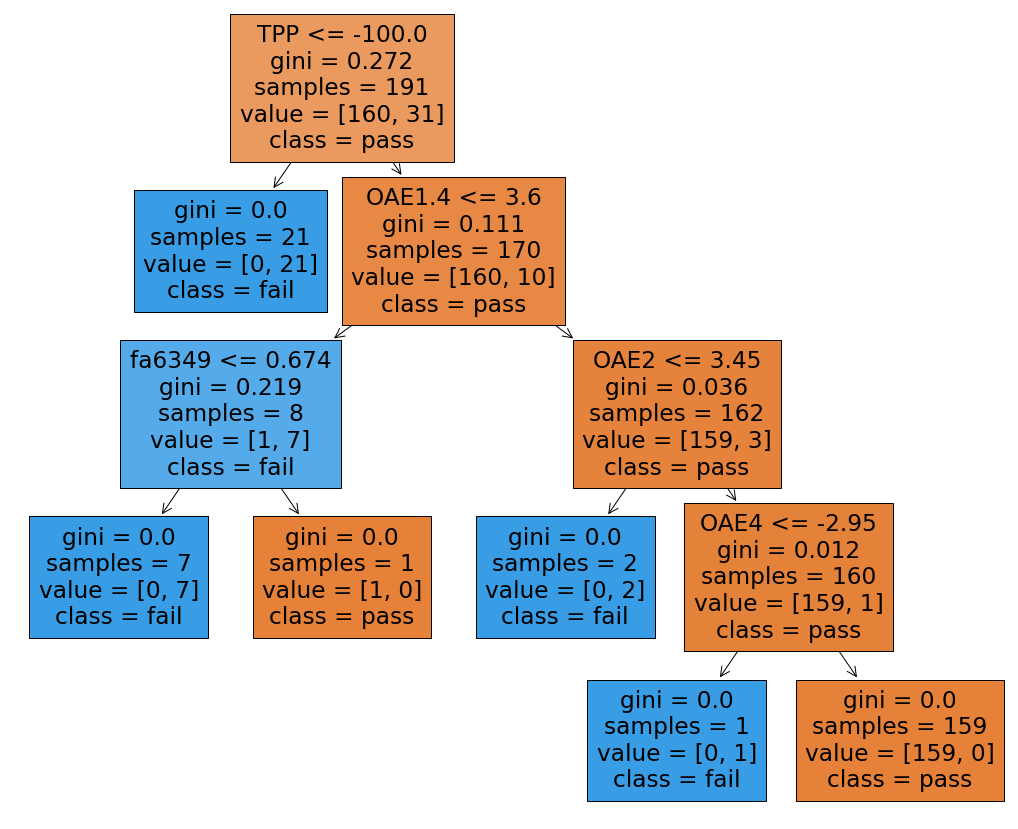

In [117]:
# find the name of features of the training dataset
X_train_name = X_train.columns.to_list()

fig = plt.figure(figsize=(18,15))
_ = tree.plot_tree(clf_gini, feature_names=X_train_name,class_names=['pass', 'fail'], filled=True)

#fig.savefig("decistion_tree.png")

# 2. With handling imbalenced dataset (Resampling Techniques)

## 2.1. Absorbance data with only frequencies

### Oversampling Minority Class

In [132]:
# concatenate our training data back together
train = pd.concat([X_train_frequencies_a, y_train], axis=1)
train.head()

,fa226,fa257,fa280,fa297,fa324,fa343,fa363,fa385,fa408,fa432,...,fa6349,fa6535,fa6727,fa6924,fa7127,fa7336,fa7550,fa7772,fa8000,OverallPoF
0,0.0575,0.0933,0.1314,0.1436,0.1464,0.1438,0.1519,0.1765,0.1964,0.1965,...,0.0374,0.0126,0.0112,0.0307,0.0162,0.0208,0.0144,0.0337,0.0217,0
1,0.0612,0.1023,0.1442,0.1607,0.1558,0.1494,0.1620,0.1866,0.2030,0.2015,...,0.2110,0.2030,0.2176,0.2472,0.2470,0.2682,0.2718,0.3107,0.3356,0
2,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,0.2090,...,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659,0
3,0.0082,0.0325,0.0575,0.0674,0.0621,0.0536,0.0582,0.0727,0.0808,0.0751,...,0.2478,0.2058,0.1763,0.1718,0.1403,0.1255,0.0935,0.1069,0.0527,1
4,0.0000,0.0104,0.0287,0.0345,0.0271,0.0186,0.0203,0.0298,0.0345,0.0278,...,0.0454,0.0011,0.0211,0.0593,0.0151,0.0000,0.0000,0.0000,0.0000,1


(320, 108)


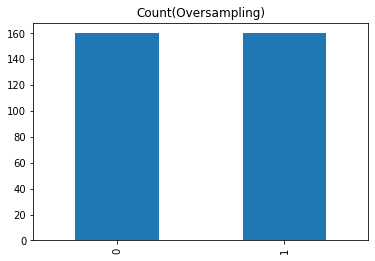

In [220]:
def oversampling_fn(df_train):
# separate minority and majority classes
    pass_ = df_train[df_train.OverallPoF==0]
    fail_ = df_train[df_train.OverallPoF==1]

    # upsample minority
    fail_oversampled = resample(fail_,
                            replace=True, # sample with replacement
                            n_samples=len(pass_), # match number in majority class
                            random_state=27) # reproducible results

    # combine majority and oversampled minority
    oversampled = pd.concat([pass_, fail_oversampled])
    return oversampled

# check new class counts
oversampled = oversampling_fn(train)
oversampled.OverallPoF.value_counts().plot(kind='bar', title='Count(Oversampling)')
print(oversampled.shape)

### Decision trees 

In [221]:
# try decision tree with the balanced dataset
y_train_balanced = oversampled.OverallPoF
X_train_freq_a_balanced = oversampled.drop("OverallPoF", axis=1)

# fit the model
clf_oversampled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
clf_oversampled.fit(X_train_freq_a_balanced , y_train_balanced)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [222]:
# Calculate accuracy score and f1 score
y_pred_oversampled = clf_oversampled.predict(X_test_frequencies_a)
y_pred_oversampled_train = clf_oversampled.predict(X_train_freq_a_balanced)

print('Accuracy score (training set) (Oversampling): {0:0.4f}'. format(accuracy_score(y_train_balanced, y_pred_oversampled_train)))
print('Accuracy score (test set) (Oversampling): {0:0.4f}'. format(accuracy_score(y_test, y_pred_oversampled)))
print('F1 score (training set): {0:0.4f}'. format(f1_score(y_train_balanced, y_pred_oversampled_train)))
print('F1 score (test set): {0:0.4f}'. format(f1_score(y_test, y_pred_oversampled)))

Accuracy score (training set) (Oversampling): 0.9812
Accuracy score (test set) (Oversampling): 0.9167
F1 score (training set): 0.9812
F1 score (test set): 0.7778


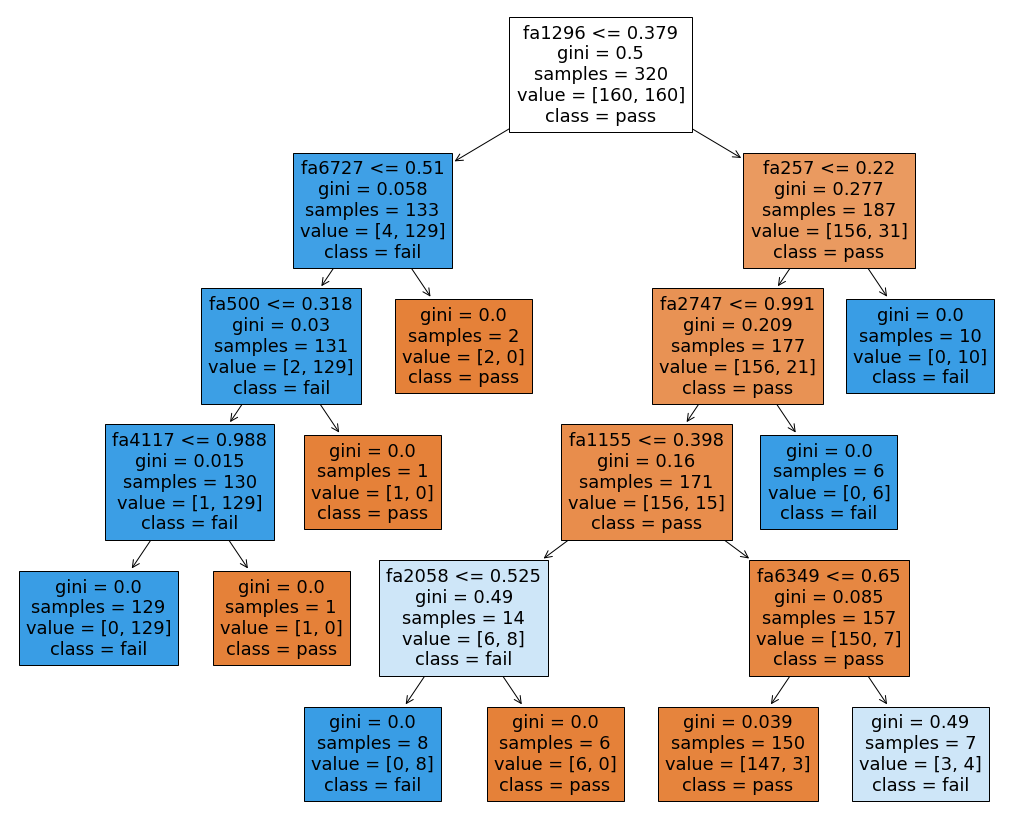

In [223]:
# find the name of features of the training dataset
X_train_name = X_train_freq_a_balanced.columns.to_list()

fig = plt.figure(figsize=(18,15))
_ = tree.plot_tree(clf_oversampled, feature_names=X_train_name,class_names=['pass', 'fail'], filled=True)

#fig.savefig("decistion_tree.png")

## 2.2. Absorbance data with frequencies + age

### Oversampling Minority Class

In [224]:
X_train_age_a = pd.concat([X_train_frequencies_a, X_train.AgeM], axis=1)
# concatenate our training data back together
train_age = pd.concat([X_train_age_a , y_train], axis=1)
train_age.head()

,fa226,fa257,fa280,fa297,fa324,fa343,fa363,fa385,fa408,fa432,...,fa6535,fa6727,fa6924,fa7127,fa7336,fa7550,fa7772,fa8000,AgeM,OverallPoF
0,0.0575,0.0933,0.1314,0.1436,0.1464,0.1438,0.1519,0.1765,0.1964,0.1965,...,0.0126,0.0112,0.0307,0.0162,0.0208,0.0144,0.0337,0.0217,97,0
1,0.0612,0.1023,0.1442,0.1607,0.1558,0.1494,0.1620,0.1866,0.2030,0.2015,...,0.2030,0.2176,0.2472,0.2470,0.2682,0.2718,0.3107,0.3356,121,0
2,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,0.2090,...,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659,114,0
3,0.0082,0.0325,0.0575,0.0674,0.0621,0.0536,0.0582,0.0727,0.0808,0.0751,...,0.2058,0.1763,0.1718,0.1403,0.1255,0.0935,0.1069,0.0527,117,1
4,0.0000,0.0104,0.0287,0.0345,0.0271,0.0186,0.0203,0.0298,0.0345,0.0278,...,0.0011,0.0211,0.0593,0.0151,0.0000,0.0000,0.0000,0.0000,105,1


In [231]:
X_test_age_a = pd.concat([X_test_frequencies_a, X_test.AgeM], axis=1)
X_test_age_a.head()

,fa226,fa257,fa280,fa297,fa324,fa343,fa363,fa385,fa408,fa432,...,fa6349,fa6535,fa6727,fa6924,fa7127,fa7336,fa7550,fa7772,fa8000,AgeM
0,0.0115,0.0359,0.0611,0.0688,0.0654,0.0578,0.0622,0.0754,0.0838,0.0798,...,0.3589,0.2946,0.2479,0.2311,0.2131,0.2172,0.2036,0.2074,0.2245,93
1,0.0279,0.0603,0.0930,0.1071,0.1058,0.1034,0.1139,0.1368,0.1535,0.1565,...,0.0542,0.0266,0.0066,0.0114,0.0000,0.0004,0.0000,0.0000,0.0000,97
2,0.0547,0.0881,0.1232,0.1382,0.1344,0.1278,0.1357,0.1565,0.1710,0.1710,...,0.1072,0.0914,0.0763,0.0834,0.0659,0.0629,0.0407,0.0561,0.0325,103
3,0.0044,0.0238,0.0447,0.0508,0.0449,0.0347,0.0357,0.0481,0.0538,0.0497,...,0.3583,0.2997,0.2709,0.2544,0.1956,0.1648,0.1158,0.1083,0.0542,103
4,0.0663,0.0736,0.1023,0.1360,0.1672,0.1821,0.1816,0.1662,0.1411,0.1296,...,0.1930,0.1592,0.1549,0.1346,0.1250,0.1125,0.1242,0.1356,0.1372,104


(320, 109)


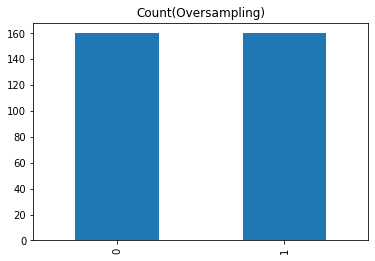

In [225]:
# check new class counts
oversampled_age = oversampling_fn(train_age)
oversampled_age.OverallPoF.value_counts().plot(kind='bar', title='Count(Oversampling)')
print(oversampled_age.shape)

### Decision trees 

In [227]:
# Split X and y
y_train_balanced_age = oversampled_age.OverallPoF
X_train_freq_a_balanced_age = oversampled_age.drop("OverallPoF", axis=1)

In [228]:
# try decision tree with the balanced dataset
y_train_balanced_age = oversampled_age.OverallPoF
X_train_freq_a_balanced_age = oversampled_age.drop("OverallPoF", axis=1)

# fit the model
clf_oversampled_age = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
clf_oversampled_age.fit(X_train_freq_a_balanced_age, y_train_balanced_age)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [232]:
# Calculate accuracy score and f1 score
y_pred_oversampled_age = clf_oversampled_age.predict(X_test_age_a)
y_pred_oversampled_train_age = clf_oversampled_age.predict(X_train_freq_a_balanced_age)

print('Accuracy score (training set) (Oversampling): {0:0.4f}'. format(accuracy_score(y_train_balanced_age, y_pred_oversampled_train_age)))
print('Accuracy score (test set) (Oversampling): {0:0.4f}'. format(accuracy_score(y_test, y_pred_oversampled_age)))
print('F1 score (training set): {0:0.4f}'. format(f1_score(y_train_balanced_age, y_pred_oversampled_train_age)))
print('F1 score (test set): {0:0.4f}'. format(f1_score(y_test, y_pred_oversampled_age)))

Accuracy score (training set) (Oversampling): 0.9812
Accuracy score (test set) (Oversampling): 0.9167
F1 score (training set): 0.9812
F1 score (test set): 0.7778


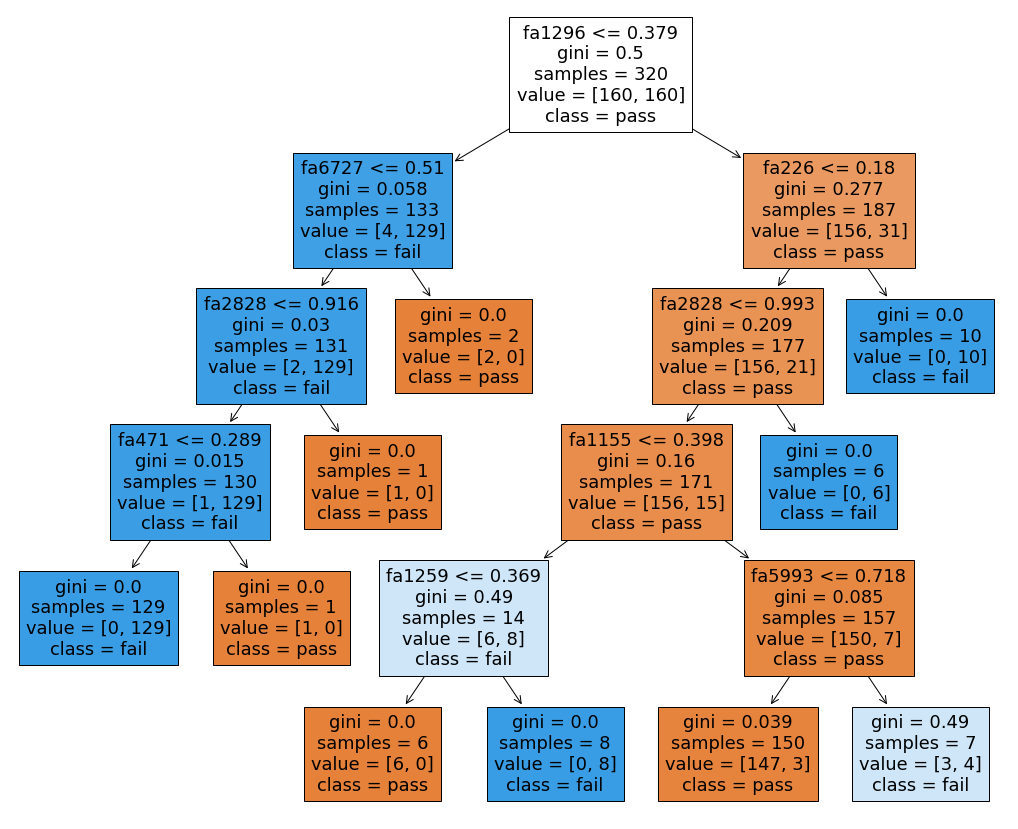

In [233]:
# find the name of features of the training dataset
X_train_name = X_train_freq_a_balanced_age.columns.to_list()

fig = plt.figure(figsize=(18,15))
_ = tree.plot_tree(clf_oversampled_age, feature_names=X_train_name,class_names=['pass', 'fail'], filled=True)

#fig.savefig("decistion_tree.png")

# 3. Summary

> **Before dealing with imbalanced data:**
> <table>
>   <thead>
>     <tr>
>       <th>Dataset</th>
>       <th>F1 score on the test set</th>
>       <th>Accuracy on the test set</th>
>     </tr>
>   </thead>
>   <tbody>
>     <tr>
>       <td>Absorbance data with frequencies only</td>
>       <td>0.7368 </td>
>       <td>0.8958 </td>
>     </tr>
>     <tr>
>       <td>Absorbance data with all variables</td>
>       <td>0.8750 </td>
>       <td>0.9583 </td>
>     </tr>
>     <tr>
>       <td>Absorbance + YAdmittance + Phase data with frequencies only</td>
>       <td>0.7000 </td>
>       <td>0.8750 </td>
>     </tr>
>     <tr>
>       <td>Absorbance + YAdmittance + Phase data with all variables</td>
>       <td>0.8750 </td>
>       <td>0.9583 </td>
>     </tr>
>   </tbody>
> </table>
>
> **Dealing with imbalanced data (oversampling on the training set):**
> <table>
>   <thead>
>     <tr>
>       <th>Dataset</th>
>       <th>F1 score on the test set</th>
>       <th>Accuracy on the test set</th>
>     </tr>
>   </thead>
>   <tbody>
>     <tr>
>       <td>Absorbance data with frequencies only</td>
>       <td>0.7778 </td>
>       <td>0.9167 </td>
>     </tr>
>     <tr>
>       <td>Absorbance data with frequencies + age</td>
>       <td>0.7778 </td>
>       <td>0.9167 </td>
>     </tr>
>   </tbody>
> </table>
>
> For next step, I will try feature selection and other resampling methods, and focus on **the Absorbance data with frequencies only**.